In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imread,imwrite,resize
from skimage.feature import graycomatrix, graycoprops
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset function
def load_data(root):
    dict_img = {}
    for dir in os.listdir(root):
        img = Image.open(os.path.join(root, dir, os.listdir(os.path.join(root, dir))[0]))
        print(img.size)
        dict_img[dir] = len(os.listdir(os.path.join(root, dir)))
    return dict_img


In [ ]:
#plot sample from dataset function
def plot_first_img_from_each_dir(root):
  dict_img = load_data(root)
  fig, ax = plt.subplots(1, len(dict_img), figsize=(10, 5))
  for i, dir in enumerate(dict_img):
    img = Image.open(os.path.join(root, dir, os.listdir(os.path.join(root, dir))[0]))
    ax[i].imshow(img)
    ax[i].set_title(dir)
  plt.show()


In [ ]:
#load original dataset
root =  '/content/drive/MyDrive/dataset'


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


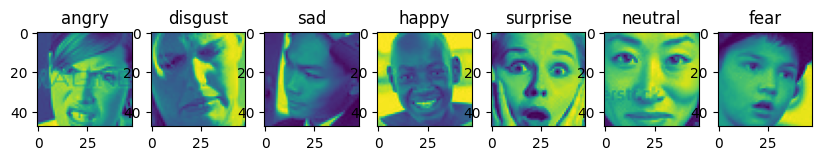

In [ ]:
#plot first image from each directory
plot_first_img_from_each_dir(root)

In [ ]:
#function to enhance image using opencv
def enhance_image(img):
  #convert image to grayscale
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #apply CLAHE to enhance image contrast  (Contrast Limited Adaptive Histogram Equalization)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  enhanced_img = clahe.apply(gray_img)

  #convert image back to BGR
  enhanced_img = cv2.cvtColor(enhanced_img, cv2.COLOR_GRAY2BGR)

  #return enhanced image
  return enhanced_img

#create new dataset to store enhanced images
enhanced_root = '/content/drive/MyDrive/enhanced2'
os.makedirs(enhanced_root, exist_ok=True)

#iterate over each directory in original dataset
for dir in os.listdir(root):
  #create directory to store enhanced images for each class
  enhanced_dir = os.path.join(enhanced_root, dir)
  os.makedirs(enhanced_dir, exist_ok=True)

  #iterate over each image in directory
  for img_name in os.listdir(os.path.join(root, dir)):
    #load image
    img = imread(os.path.join(root, dir, img_name))

    #enhance image
    enhanced_img = enhance_image(img)

    #save enhanced image
    imwrite(os.path.join(enhanced_dir, img_name), enhanced_img)


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


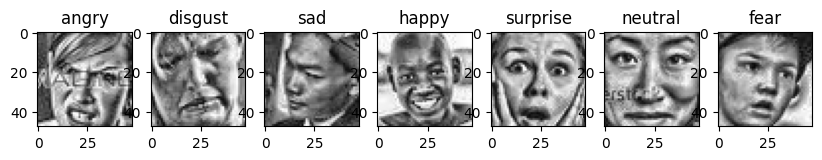

In [ ]:
plot_first_img_from_each_dir(enhanced_root)

In [ ]:


def enhance_image(img):
  # Convert to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply histogram equalization
  img = cv2.equalizeHist(img)

  # Apply bilateral filter for image smoothing and noise reduction
  img = cv2.bilateralFilter(img, 9, 15, 25)

  return img

def main():
  # Load the dataset
  root = '/content/drive/MyDrive/dataset'
  dict_img = load_data(root)

  # Create a new dataset for the enhanced images
  new_root = '/content/drive/MyDrive/enhanced3_dataset'
  os.makedirs(new_root, exist_ok=True)

  # Enhance each image and save it to the new dataset
  for dir in dict_img:
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      enhanced_img = enhance_image(img)
      imwrite(os.path.join(new_root, dir, img_name), enhanced_img)

if __name__ == '__main__':
  main()


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


In [ ]:
#plot first image from each directory
plot_first_img_from_each_dir('/content/drive/MyDrive/enhanced3_dataset')

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
